In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# print python module versions
print('numpy version      ', np.__version__)
print('pandas version     ', pd.__version__)
print('seaborn version    ', sns.__version__)
import matplotlib; print('matplotlib version ', matplotlib.__version__)

numpy version       1.20.1
pandas version      1.3.2
seaborn version     0.11.2
matplotlib version  3.3.2


In [3]:
data_dir = os.path.abspath('/Users/KRS228/data')

In [33]:
# define the filepath for the post mortem connectivity matrix
postmortem_matrix_fpath = os.path.join(data_dir, 
                            'postmortem/analysis/dsi_studio/',
                            'IC_subdivisions',
                            'connectivity_networks',
                            'whole_brain_ROIs_cg.txt')

In [34]:
# define the filepath for the in vivo connectivity matrix
mgh_matrix_fpath = os.path.join(data_dir, 
                            'mgh_dwi_760um/regions_IC',
                            'connectivity_networks',
                            'whole_brain_ROIs_cg.txt')

In [35]:
# define the filepath for the Maastricht matrix
maas_matrix_fpath = os.path.join(data_dir, 'maastricht_dwi',
                                 'preprocessed/dsi_studio',
                                 'connectivity',
                                 'mean_connectivity.txt')

In [37]:
# dictionary of datasets and filepaths
matrix_dict = {'postmortem': postmortem_matrix_fpath,
               'invivo_submillimeter': mgh_matrix_fpath,
               'invivo_10-subject': maas_matrix_fpath}

postmortem
/Users/KRS228/data/postmortem/analysis/dsi_studio/IC_subdivisions/connectivity_networks/whole_brain_ROIs_cg.txt
    data         data.1  LL_IC  brachium_IC  commissure_IC  L_ICc  L_ICd  \
0   8188          LL_IC      0           82            962    336    626   
1   2376    brachium_IC     82            0            414     36    122   
2  31744  commissure_IC    962          414              0   1218   5860   
3  21400          L_ICc    336           36           1218      0   4304   
4  36028          L_ICd    626          122           5860   4304      0   
5  21844          L_ICx     66          244           1318   4010   4218   
6   7440          R_ICc    654            4            320     10     84   
7  26084          R_ICd    438          272           5514    786   2786   
8   7104          R_ICx    930           14            266      0     14   

   L_ICx  R_ICc  R_ICd  R_ICx  
0     66    654    438    930  
1    244      4    272     14  
2   1318    320   55

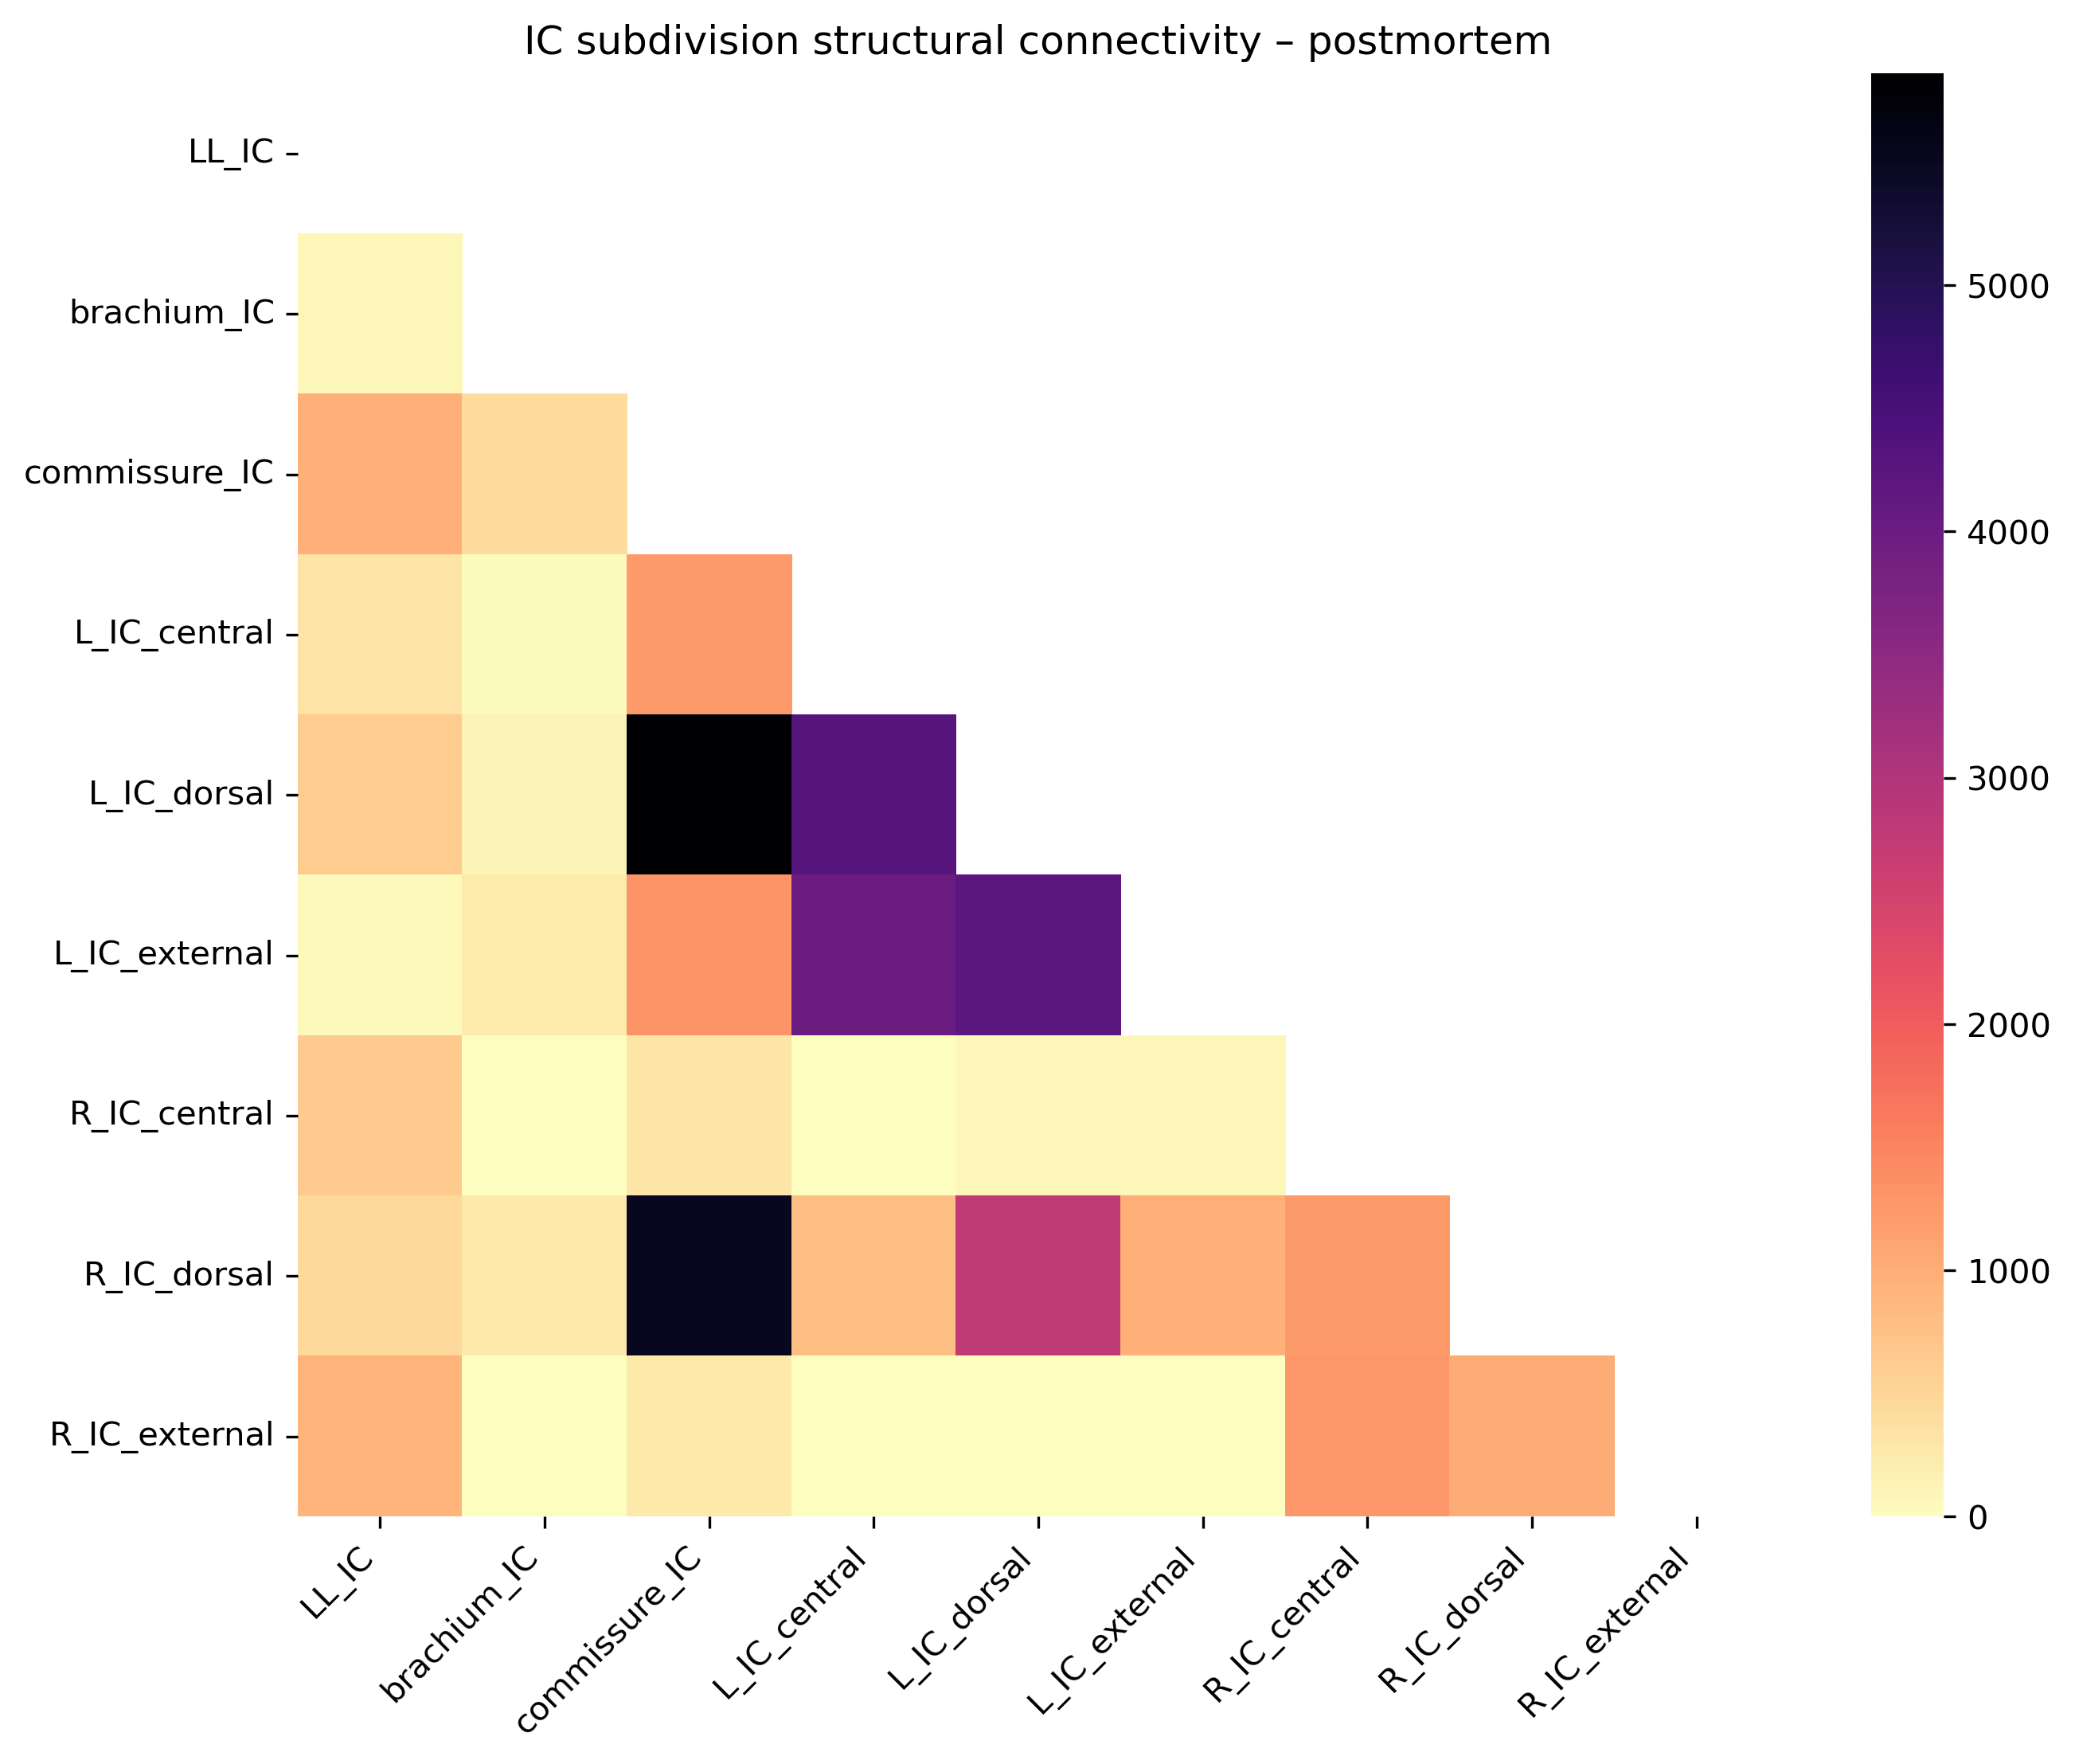

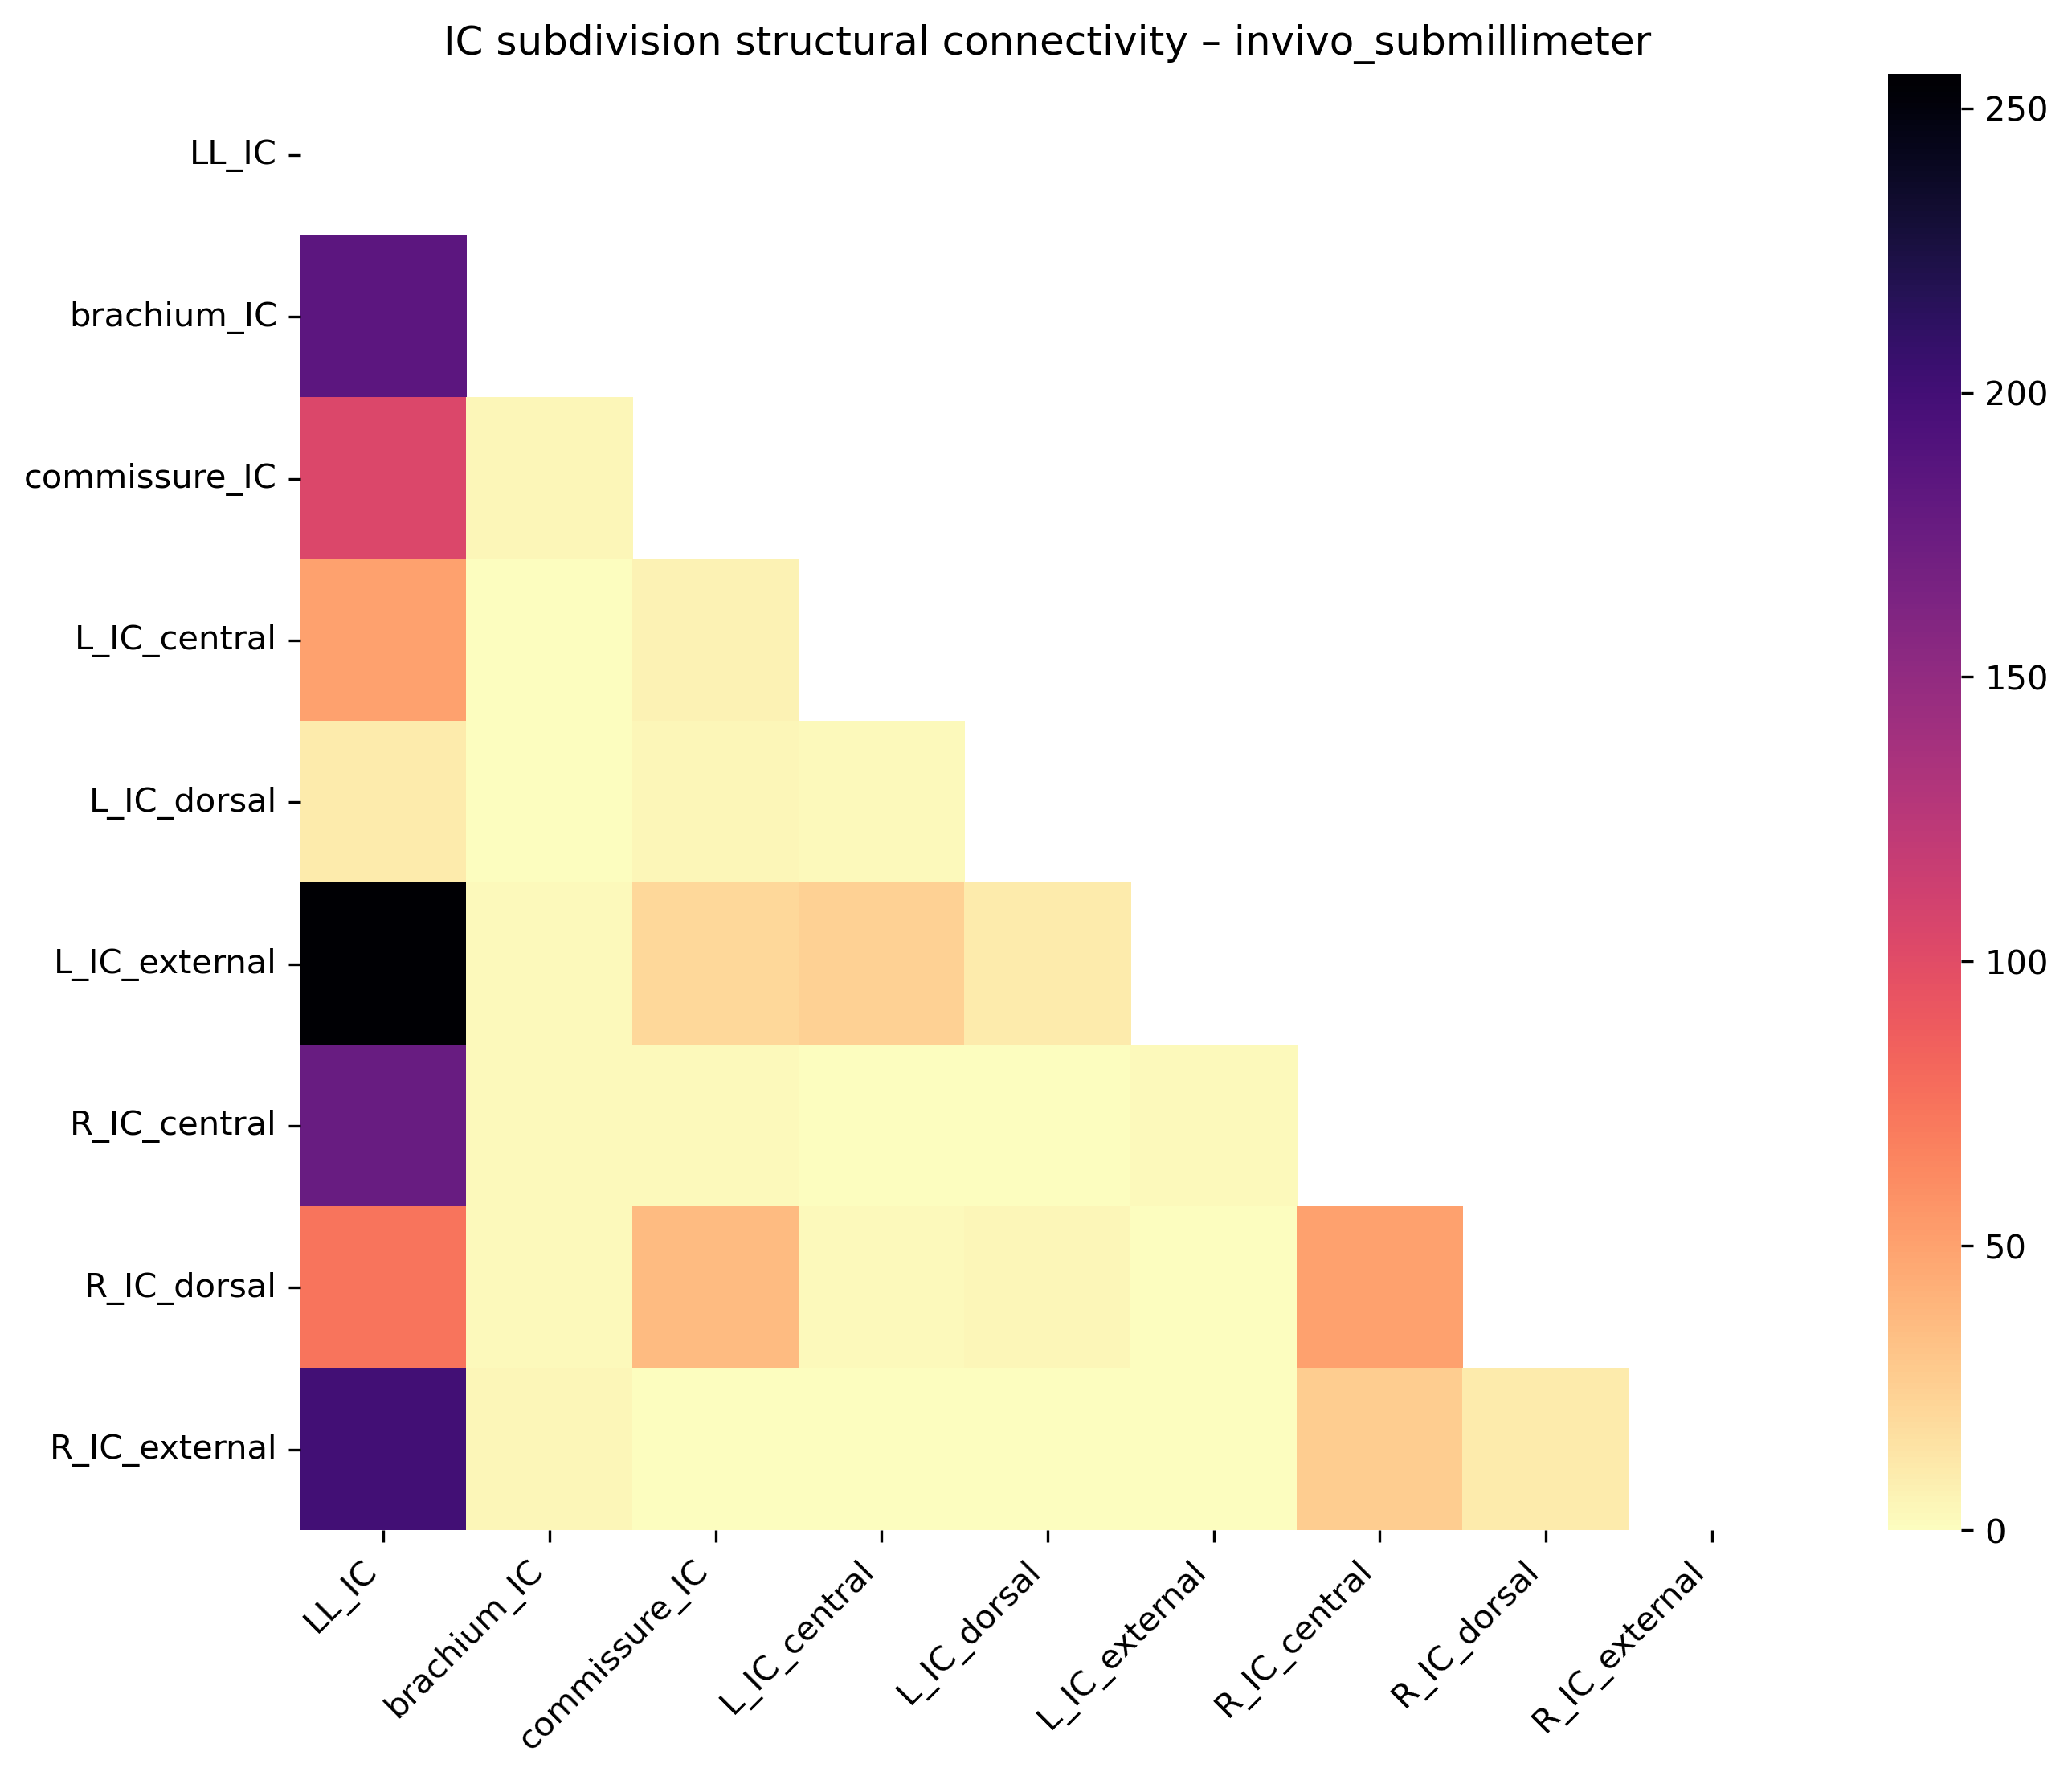

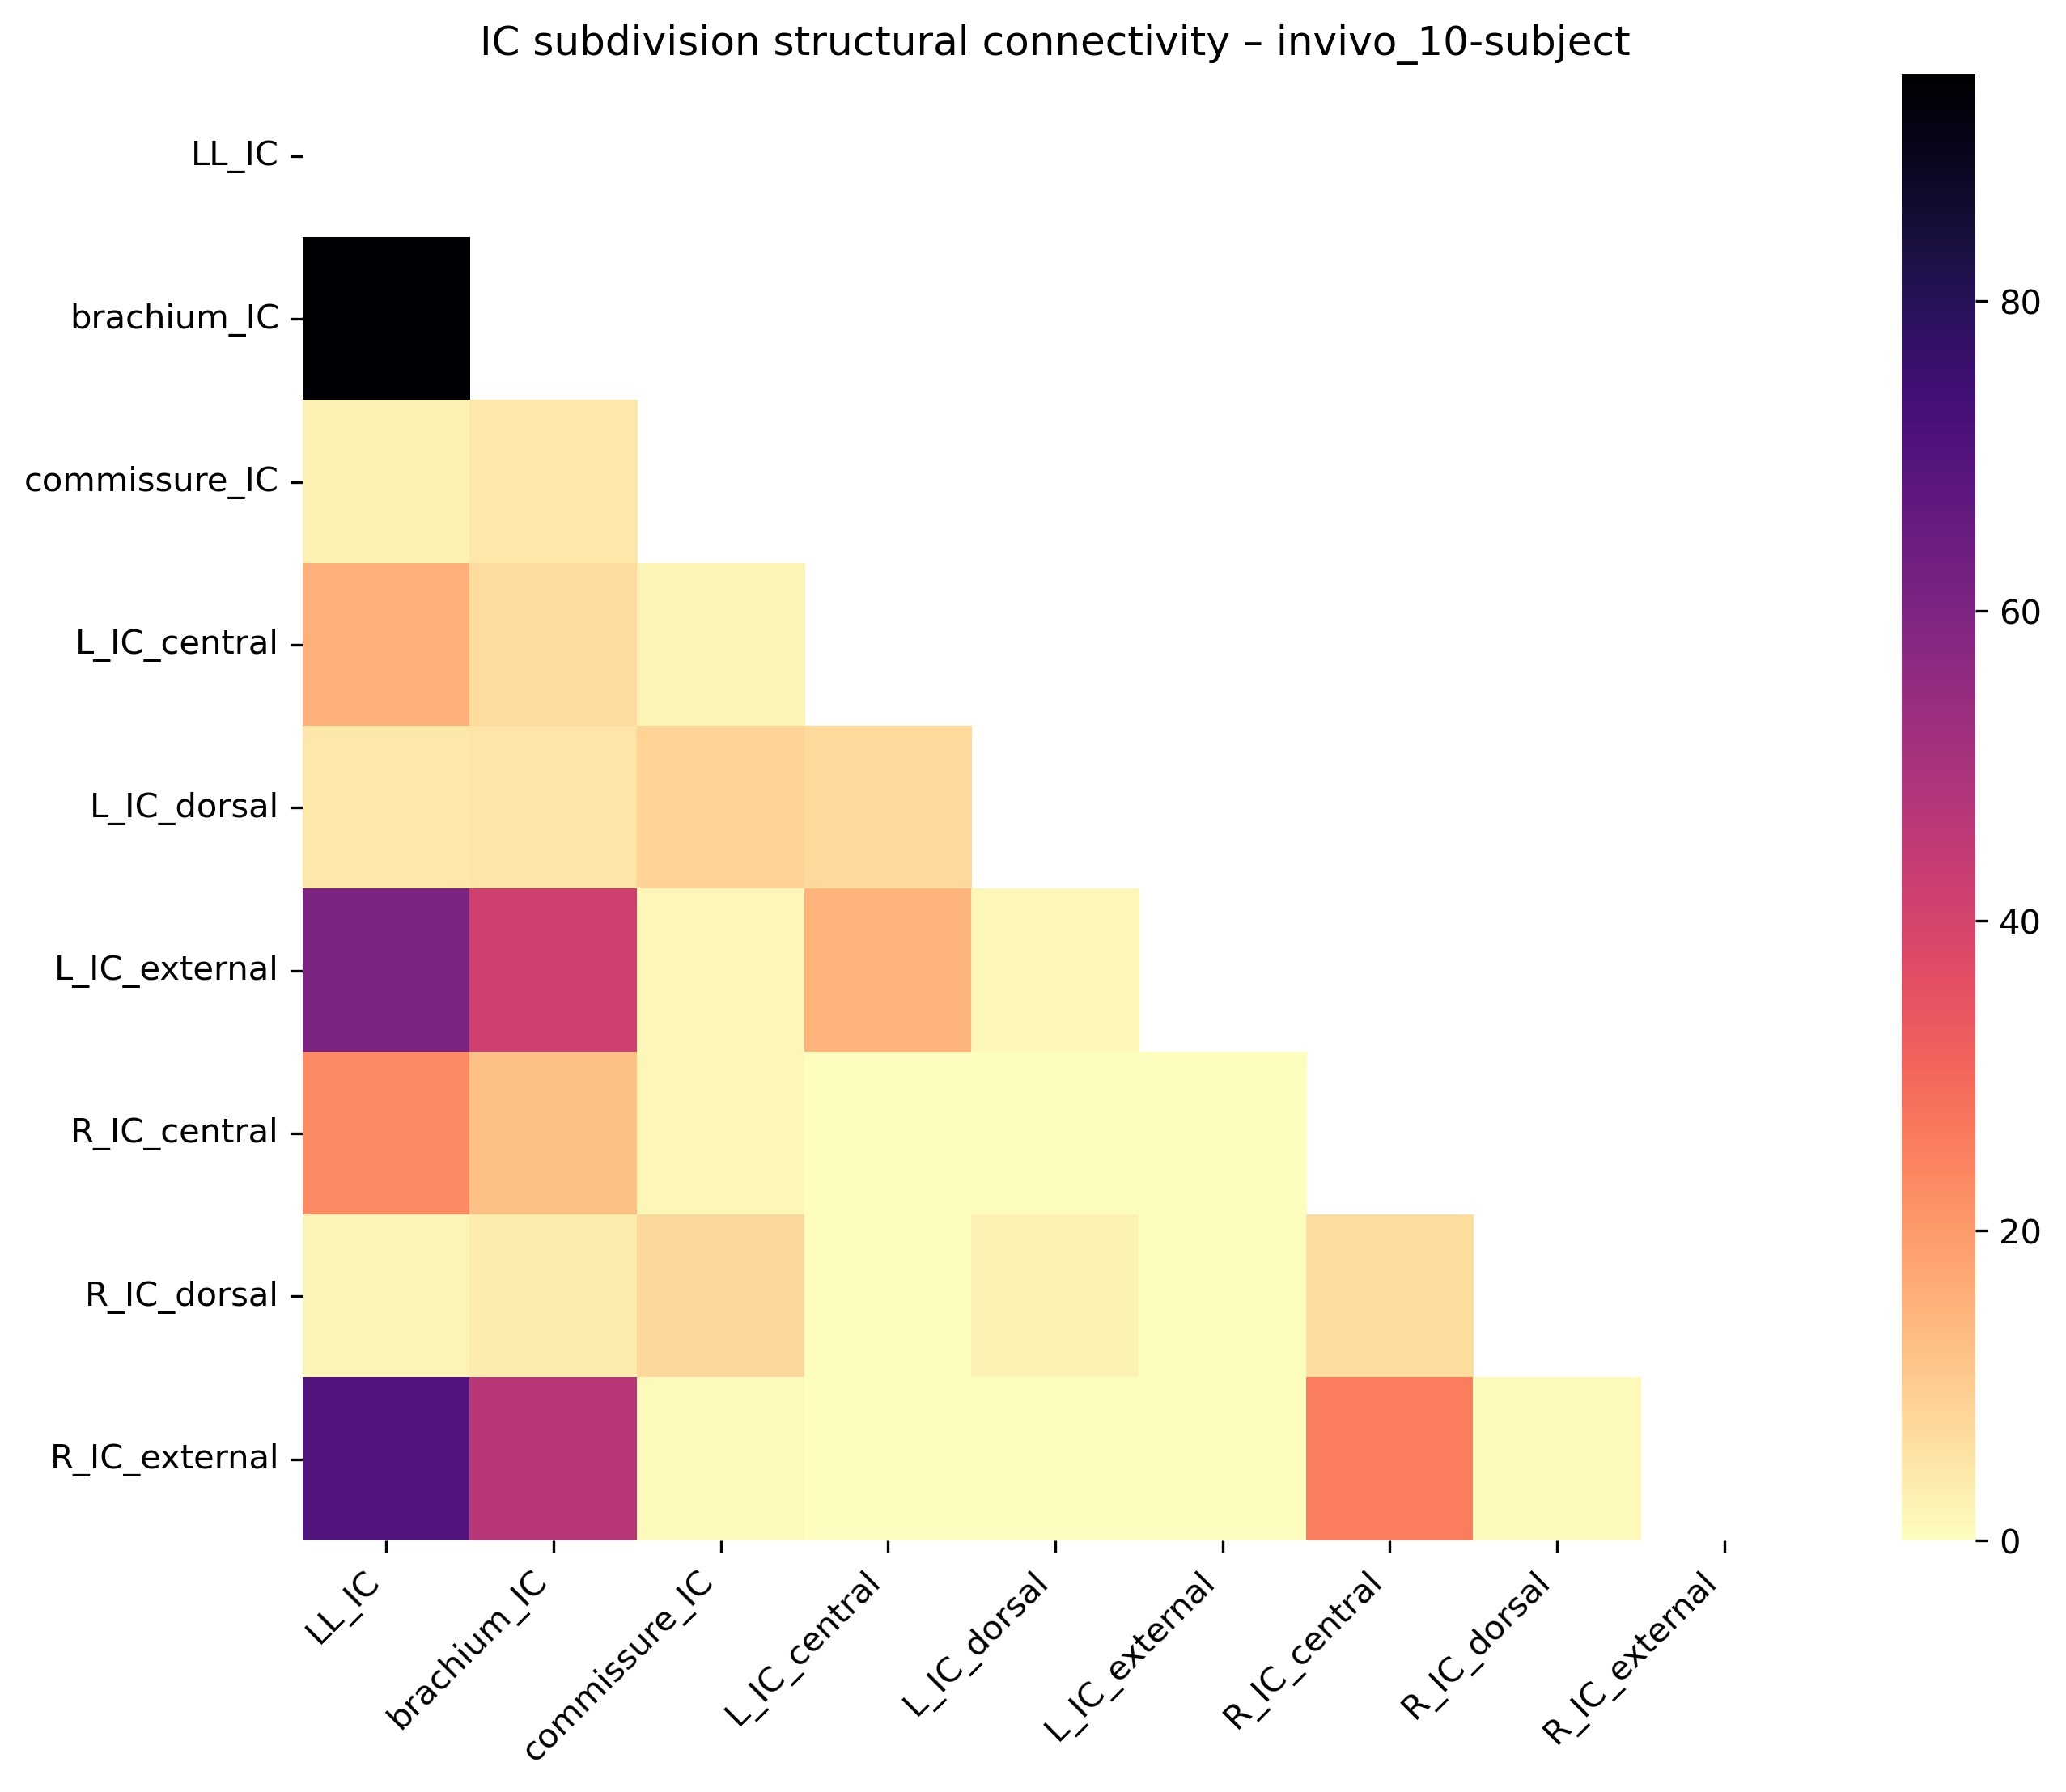

In [57]:
for key, matrix_fpath in matrix_dict.items():
    print(key)
    print(matrix_fpath)

    # load the connectivity matrix into a pandas dataframe
    if '10-subject' in key:
        # maastricht dataset was already preprocessed to compute
        # the mean and so does not have a header
        df = pd.read_csv(matrix_fpath, header=0, delimiter='\t')
    else:
        # load the connectivity matrix into a pandas dataframe
        df = pd.read_csv(matrix_fpath, header=1, delimiter='\t')
        # get rid of weird column at the end
        df = df.drop(columns=df.columns[-1])

    # make df version without total streamlines, data.1 column
    plot_df = df.iloc[:,2:]

    # standardize ROI names
    plot_df.rename(columns={'L_ICc':'L_IC_central', 'L_ICd':'L_IC_dorsal', 'L_ICx':'L_IC_external',
                            'R_ICc':'R_IC_central', 'R_ICd':'R_IC_dorsal', 'R_ICx':'R_IC_external'},
                   inplace=True)
    
    
    # get the max value in the whole dataframe for scaling purposes
    df_max = plot_df.to_numpy().max()

    # create mask of lower triangle
    mask_triu = np.triu(np.ones_like(plot_df, dtype=bool))

    # plot the connectivity heatmap
    f, ax = plt.subplots(figsize=(10, 8), dpi=300)
    sns.heatmap(plot_df, ax=ax, cmap="magma_r",
                xticklabels=plot_df, yticklabels=plot_df,  
                mask=mask_triu)
    ax.set_title('IC subdivision structural connectivity – %s'%key);
    ax.set_xticklabels(plot_df, ha='right', rotation=45);


    # save the figure
    f.savefig('IC_subdivision_conn_matrix_%s.png'%key)

## plot values per WM region

In [60]:
norm_df = df.copy()
norm_df.iloc[:,2:] = norm_df.iloc[:,2:].div(norm_df['data'], axis=0)

In [61]:
norm_df

,data,data.1,LL_IC,brachium_IC,commissure_IC,L_IC_central,L_IC_dorsal,L_IC_external,R_IC_central,R_IC_dorsal,R_IC_external
0,546.8,LL_IC,0.000000,0.173007,0.004389,0.028895,0.008413,0.110461,0.042063,0.004023,0.128749
1,430.8,brachium_IC,0.219591,0.000000,0.011142,0.015785,0.011606,0.096100,0.028319,0.008357,0.109099
2,58.4,commissure_IC,0.041096,0.082192,0.000000,0.037671,0.147260,0.023973,0.020548,0.130137,0.017123
3,94.0,L_ICc,0.168085,0.072340,0.023404,0.000000,0.076596,0.157447,0.000000,0.000000,0.002128
4,59.3,L_ICd,0.077572,0.084317,0.145025,0.121417,0.000000,0.026981,0.000000,0.040472,0.003373
5,239.2,L_ICx,0.252508,0.173077,0.005853,0.061873,0.006689,0.000000,0.000000,0.000000,0.000000
6,138.0,R_ICc,0.166667,0.088406,0.008696,0.000000,0.000000,0.000000,0.000000,0.050725,0.185507
7,47.6,R_ICd,0.046218,0.075630,0.159664,0.000000,0.050420,0.000000,0.147059,0.000000,0.021008
8,290.8,R_ICx,0.242091,0.161623,0.003439,0.000688,0.000688,0.000000,0.088033,0.003439,0.000000


In [62]:
col_list = norm_df['data.1']

In [63]:
l_mask = norm_df.columns.str.startswith('L_')
r_mask = norm_df.columns.str.startswith('R_')

In [65]:
left_df = norm_df.loc[:,l_mask]
left_df.set_index(col_list, inplace=True)

left_wm_df = left_df.loc[(left_df.index.str.startswith('LL_')) | 
                         (left_df.index.str.startswith('brachium_')) |
                         (left_df.index.str.startswith('commissure_'))]

# melt into a tall dataset
melt_left_df = left_wm_df.melt(var_name='ROI', value_name='streamline proportion', 
                                     ignore_index=False).reset_index()
melt_left_df.rename(columns={'data.1':'white matter seed'}, inplace=True)

In [66]:
# check the melted dataframe
melt_left_df

,white matter seed,ROI,streamline proportion
0,LL_IC,L_IC_central,0.028895
1,brachium_IC,L_IC_central,0.015785
2,commissure_IC,L_IC_central,0.037671
3,LL_IC,L_IC_dorsal,0.008413
4,brachium_IC,L_IC_dorsal,0.011606
5,commissure_IC,L_IC_dorsal,0.147260
6,LL_IC,L_IC_external,0.110461
7,brachium_IC,L_IC_external,0.096100
8,commissure_IC,L_IC_external,0.023973


In [67]:
# now do it for the right structures
right_df = norm_df.loc[:,r_mask]
right_df.set_index(col_list, inplace=True)

right_wm_df = right_df.loc[(left_df.index.str.startswith('LL_')) | 
                           (left_df.index.str.startswith('brachium_')) |
                           (left_df.index.str.startswith('commissure_'))]

# melt into a tall dataset
melt_right_df = right_wm_df.melt(var_name='ROI', value_name='streamline proportion', 
                                     ignore_index=False).reset_index()
melt_right_df.rename(columns={'data.1':'white matter seed'}, inplace=True)

In [68]:
# concatenate into a single tall dataset
melt_df = pd.concat([melt_left_df, melt_right_df])

In [69]:
melt_df

,white matter seed,ROI,streamline proportion
0,LL_IC,L_IC_central,0.028895
1,brachium_IC,L_IC_central,0.015785
2,commissure_IC,L_IC_central,0.037671
3,LL_IC,L_IC_dorsal,0.008413
4,brachium_IC,L_IC_dorsal,0.011606
5,commissure_IC,L_IC_dorsal,0.147260
6,LL_IC,L_IC_external,0.110461
7,brachium_IC,L_IC_external,0.096100
8,commissure_IC,L_IC_external,0.023973
0,LL_IC,R_IC_central,0.042063


In [70]:
# plot
f,axes=plt.subplots(1, 1, figsize=(8,8), dpi=1000)
sns.barplot(data=melt_df, x='ROI', y='streamline proportion', hue='white matter seed',ax=axes, palette='Set2')
axes.tick_params(rotation=45);
f.savefig('%s_IC_subdivision_wm_barplot.png'%key)